In [161]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [162]:
ds = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")

In [163]:
tmax = ds['tmax']

In [164]:
atlanta = (33. + 45/60,  360. - (84. + 23/60))

In [165]:
atlanta_tmax = tmax.sel(lat=atlanta[0], lon=atlanta[1], method='nearest')

In [166]:
time = ds['time']
independence_day = atlanta_tmax[(time.dt.month == 1) & (time.dt.day == 4)]

In [167]:
def degC_to_degF(C):
    return C * (9./5.) + 32.

In [168]:
in_f = degC_to_degF(independence_day)

In [169]:
np.percentile(in_f, 90)
# plt.fill_between(x2, y2=0, where=None, interpolate=False, step=None, data=None) 

/home/akwilson/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


nan

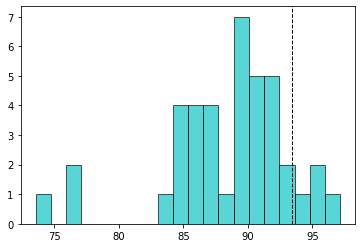

In [66]:
#Histogram
result = plt.hist(in_f, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x=93.44, color='k', linestyle='dashed', linewidth=1)


In [67]:
in_f.load()

<xarray.DataArray 'tmax' (time: 40)>
array([93.09604 , 91.6852  , 84.72127 , 92.08972 , 89.53667 , 88.96251 ,
       84.26498 , 89.978966, 85.47229 , 73.573814, 85.468216, 91.37704 ,
       90.32772 , 87.67216 , 95.660126, 76.15252 , 89.20659 , 86.83444 ,
       91.449974, 91.1073  , 88.95686 , 93.383766, 84.77115 , 88.95241 ,
       86.7651  , 88.18002 , 86.791534, 94.00111 , 86.03052 , 90.25033 ,
       90.548294, 85.39961 , 91.30022 , 97.14425 , 76.63323 , 84.15808 ,
       84.80064 , 95.1569  , 90.07652 , 90.01907 ], dtype=float32)
Coordinates:
    lat      float32 33.75
    lon      float32 275.75
  * time     (time) datetime64[ns] 1979-07-04 1980-07-04 ... 2018-07-04

In [68]:
yvals = in_f.copy(deep=True)
print(yvals)

<xarray.DataArray 'tmax' (time: 40)>
array([93.09604 , 91.6852  , 84.72127 , 92.08972 , 89.53667 , 88.96251 ,
       84.26498 , 89.978966, 85.47229 , 73.573814, 85.468216, 91.37704 ,
       90.32772 , 87.67216 , 95.660126, 76.15252 , 89.20659 , 86.83444 ,
       91.449974, 91.1073  , 88.95686 , 93.383766, 84.77115 , 88.95241 ,
       86.7651  , 88.18002 , 86.791534, 94.00111 , 86.03052 , 90.25033 ,
       90.548294, 85.39961 , 91.30022 , 97.14425 , 76.63323 , 84.15808 ,
       84.80064 , 95.1569  , 90.07652 , 90.01907 ], dtype=float32)
Coordinates:
    lat      float32 33.75
    lon      float32 275.75
  * time     (time) datetime64[ns] 1979-07-04 1980-07-04 ... 2018-07-04


Text(0, 0.5, 'Temperature (F)')

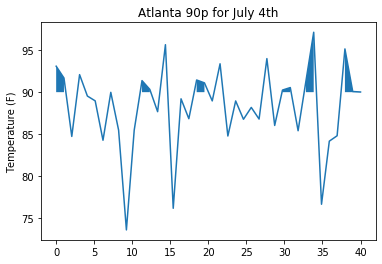

In [71]:
yvals[:] = 90.0
fig, ax = plt.subplots()
ax.plot(np.linspace(0, len(in_f['time']), len(in_f['time'])), in_f)
ax.fill_between(np.linspace(0, len(in_f['time']), len(in_f['time'])), where =(in_f>=90),
                y1=yvals,
                y2=in_f)
plt.title('Atlanta 90p for July 4th')
plt.ylabel('Temperature (F)')



In [39]:
x1 = np.linspace(0, 40, 41)
y = np.random.randint(2, 12, x.shape)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.fill_between(x, 8, y, where=(y >= 8), facecolor="crimson", interpolate=True, alpha=0.5)